# Exploratory Data Analysis on Commu dataset

Importing important libraries

In [143]:
import numpy as np
import pandas as pd
import os
import music21
from music21 import *
import IPython
from IPython.display import Image, Audio
from midi2audio import FluidSynth
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
df=pd.read_csv(r"C:\Users\zayed\Documents\DSC\dataset\commu_meta.csv")
filepath=r"C:\Users\zayed\Documents\DSC\dataset\commu_midi\commu_midi\train\raw"
midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        midis.append(midi)

In [151]:
df.head(10)

,audio_key,chord_progressions,pitch_range,num_measures,bpm,genre,track_role,inst,sample_rhythm,min_velocity,max_velocity,split_data,id,inst_cat
0,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid,8,120,cinematic,main_melody,string_ensemble,standard,101,102,train,commu00001,4
1,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_low,8,80,newage,accompaniment,acoustic_piano,standard,23,30,train,commu00002,0
2,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,150,cinematic,riff,string_violin,standard,123,127,train,commu00003,4
3,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Gm'...",mid,8,110,cinematic,pad,choir,standard,45,46,train,commu00004,7
4,aminor,"[['Am', 'Am', 'Am', 'Am', 'Em', 'Em', 'Em', 'E...",mid_low,4,60,cinematic,pad,acoustic_piano,standard,21,22,train,commu00005,0
5,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_high,8,120,cinematic,riff,string_ensemble,standard,121,122,train,commu00006,4
6,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,110,cinematic,accompaniment,string_ensemble,standard,87,96,train,commu00007,4
7,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid,4,120,cinematic,sub_melody,brass_ensemble,standard,68,92,train,commu00008,5
8,cmajor,"[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Dm'...",mid_high,8,120,cinematic,riff,string_violin,standard,117,126,train,commu00009,4
9,aminor,"[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...",mid_low,8,150,cinematic,accompaniment,string_ensemble,standard,113,122,train,commu00010,4


Removing unnamed column

In [146]:
df=df.drop(df.columns[[0,10]],axis=1)

Unique Instruments available

In [148]:
inst=df['inst'].unique()
print(inst)

['string_ensemble' 'acoustic_piano' 'string_violin' 'choir'
 'brass_ensemble' 'acoustic_piano-2' 'celesta' 'bassoon-2' 'flute'
 'string_cello' 'harp' 'string_viola' 'clarinet' 'horn' 'electric_piano'
 'string_violin-2' 'celesta-2' 'clarinet-2' 'bassoon-1' 'bassoon'
 'synth_pad' 'synth_pluck' 'synth_voice-2' 'synth_bass_wobble-2'
 'glockenspiel' 'synth_bass-2' 'synth_voice' 'synth_bass_wobble-3'
 'tuba-2' 'electric_guitar_distortion-3' 'synth_bass' 'synth_pluck-2'
 'tuba-3' 'synth_pad-4' 'synth_bass-3' 'electric_guitar_distortion'
 'electric_guitar_distortion-2' 'synth_pad-3' 'synth_bass_wobble'
 'string_ensemble-2' 'synth_pluck-3' 'synth_pad-2' 'tuba' 'harp-3'
 'synth_pluck-4' 'timpani' 'acoustic_guitar' 'trombone-4' 'tuba-6'
 'synth_voice-3' 'tuba-5' 'string_double_bass'
 'electric_guitar_distortion-4' 'synth_pad-5' 'synth_pad-7'
 'synth_pluck-5' 'string_cello-2' 'synth_pluck-6' 'electric_bass'
 'synth_pad-6' 'horn-2' 'oboe' 'synth_bell' 'trombone' 'tuba-4'
 'brass_ensemble-2' 'horn-3

Mapping into 8 major instruments : <br>
 0 : keyboard <br>
 1 : lead <br>
 2 : idiophone <br>
 3 : plucked string(guitar and bass) <br>
 4 : string <br>
 5 : wind <br>
 6 : percussiion <br>
 7 : other <br>

In [149]:
INST_MAP = {
    "accordion": 1,
    "acoustic_bass": 3,
    "acoustic_guitar": 3,
    "acoustic_piano": 0,
    "banjo": 3,
    "bassoon": 5,
    "bell": 2,
    "brass_ensemble": 5,
    "celesta": 2,
    "choir": 7,
    "clarinet": 5,
    "drums_full": 6,
    "drums_tops": 6,
    "electric_bass": 3,
    "electric_guitar_clean": 3,
    "electric_guitar_distortion": 3,
    "electric_piano": 0,
    "fiddle": 4,
    "flute": 5,
    "glockenspiel": 2,
    "harp": 3,
    "harpsichord": 0,
    "horn": 5,
    "keyboard": 0,
    "mandolin": 3,
    "marimba": 2,
    "nylon_guitar": 3,
    "oboe": 5,
    "organ": 0,
    "oud": 3,
    "pad_synth": 4,
    "percussion": 6,
    "recorder": 5,
    "sitar": 3,
    "string_cello": 4,
    "string_double_bass": 4,
    "string_ensemble": 4,
    "string_viola": 4,
    "string_violin": 4,
    "synth_bass": 3,
    "synth_bass_808": 3,
    "synth_bass_wobble": 3,
    "synth_bell": 2,
    "synth_lead": 1,
    "synth_pad": 4,
    "synth_pluck": 7,
    "synth_voice": 7,
    "timpani": 6,
    "trombone": 5,
    "trumpet": 5,
    "tuba": 5,
    "ukulele": 3,
    "vibraphone": 2,
    "whistle": 7,
    "xylophone": 2,
    "zither": 3,
    "orgel": 2,
    "synth_brass": 5,
    "sax": 5,
    "bamboo_flute": 5,
    "yanggeum": 3,
    "vocal": 8,
}

In [150]:
def map_instruments(instrument_data):
    for key in INST_MAP:
        if key in instrument_data:
            return INST_MAP[key]  
df['inst_cat'] = df['inst'].apply(map_instruments)

Information regarding the dataset

In [152]:
df.describe()

,num_measures,bpm,min_velocity,max_velocity,inst_cat
count,11144.000000,11144.000000,11144.000000,11144.000000,11144.000000
mean,7.844131,91.702710,59.339465,71.011127,2.522703
std,3.228033,31.037601,27.298189,27.394444,1.997042
min,4.000000,35.000000,2.000000,2.000000,0.000000
25%,8.000000,65.000000,39.000000,52.000000,0.000000
50%,8.000000,80.000000,56.000000,70.000000,4.000000
75%,8.000000,120.000000,77.000000,90.000000,4.000000
max,17.000000,155.000000,127.000000,127.000000,7.000000


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   audio_key           11144 non-null  object
 1   chord_progressions  11144 non-null  object
 2   pitch_range         11144 non-null  object
 3   num_measures        11144 non-null  int64 
 4   bpm                 11144 non-null  int64 
 5   genre               11144 non-null  object
 6   track_role          11144 non-null  object
 7   inst                11144 non-null  object
 8   sample_rhythm       11144 non-null  object
 9   min_velocity        11144 non-null  int64 
 10  max_velocity        11144 non-null  int64 
 11  split_data          11144 non-null  object
 12  id                  11144 non-null  object
 13  inst_cat            11144 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


In [154]:
for col in df:
    print(col," ",df[col].nunique())

audio_key   2
chord_progressions   292
pitch_range   7
num_measures   6
bpm   22
genre   2
track_role   6
inst   130
sample_rhythm   2
min_velocity   124
max_velocity   116
split_data   2
id   11144
inst_cat   8


In [155]:
df.corr()

,num_measures,bpm,min_velocity,max_velocity,inst_cat
num_measures,1.000000,0.559589,0.126942,0.226859,0.115711
bpm,0.559589,1.000000,0.448413,0.474995,0.178746
min_velocity,0.126942,0.448413,1.000000,0.884694,0.432342
max_velocity,0.226859,0.474995,0.884694,1.000000,0.421454
inst_cat,0.115711,0.178746,0.432342,0.421454,1.000000


Count and Distribution based on columns

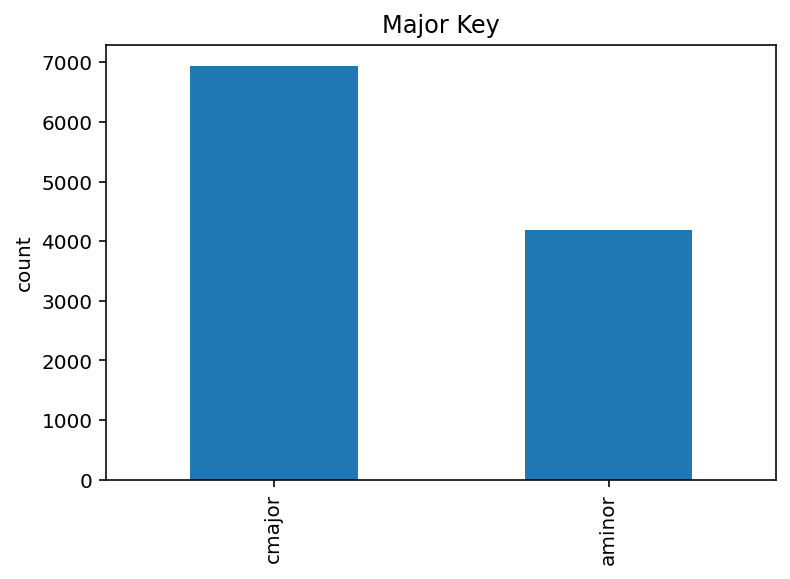

In [160]:
df['audio_key'].value_counts().plot.bar()
plt.title("Major Key")
plt.ylabel("count")
plt.show()

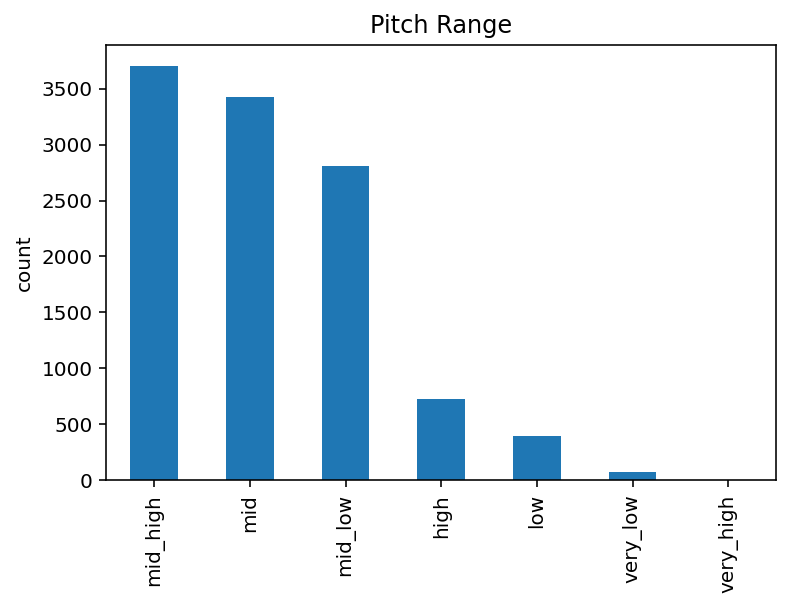

In [156]:
df['pitch_range'].value_counts().plot.bar()
plt.title("Pitch Range")
plt.ylabel("count")
plt.show()

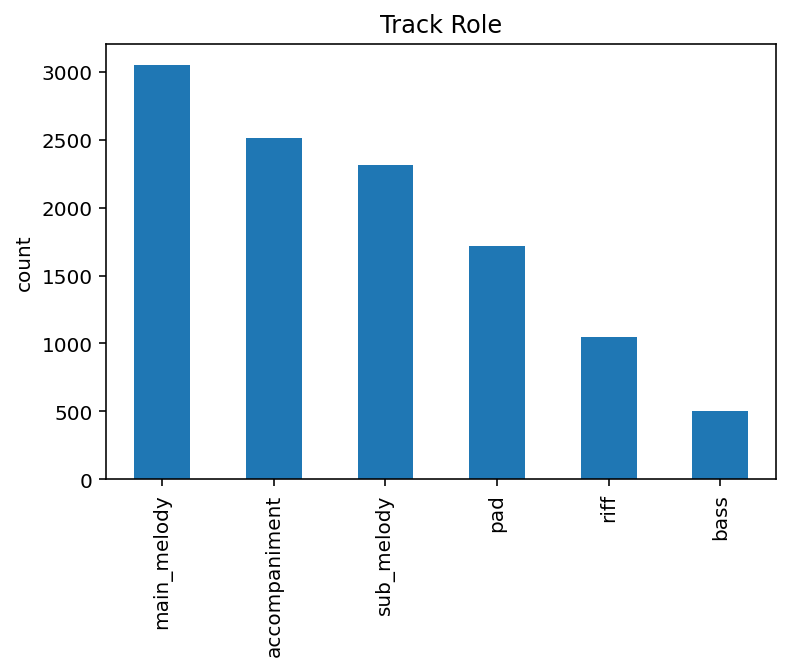

In [161]:
df['track_role'].value_counts().plot.bar()
plt.title("Track Role")
plt.ylabel("count")
plt.show()

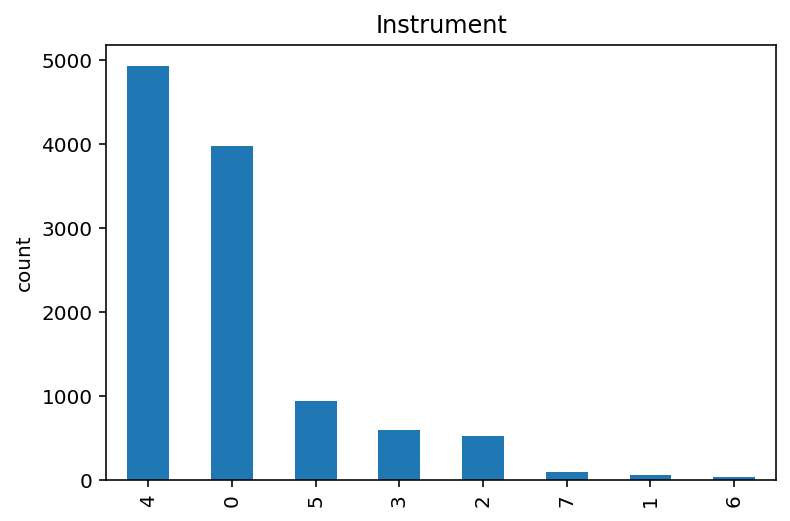

In [159]:
df['inst_cat'].value_counts().plot.bar()
plt.title("Instrument")
plt.ylabel("count")
plt.show()

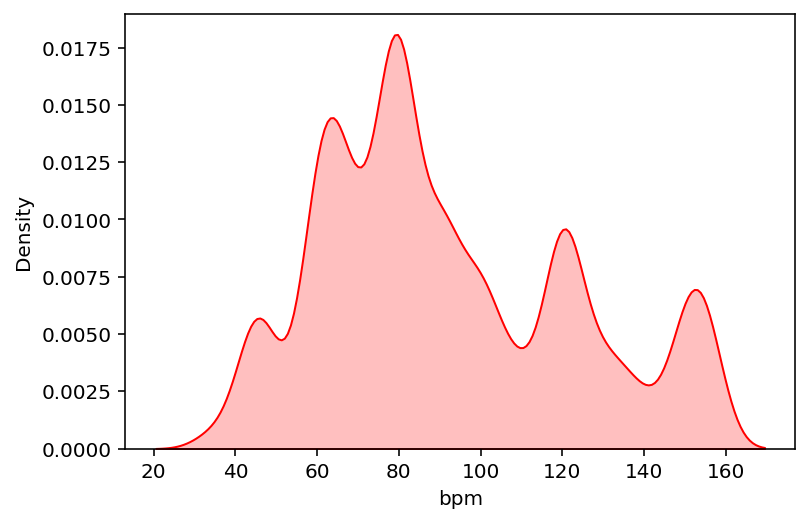

In [162]:
sns.kdeplot(df['bpm'],color='red',shade=True)
plt.show()

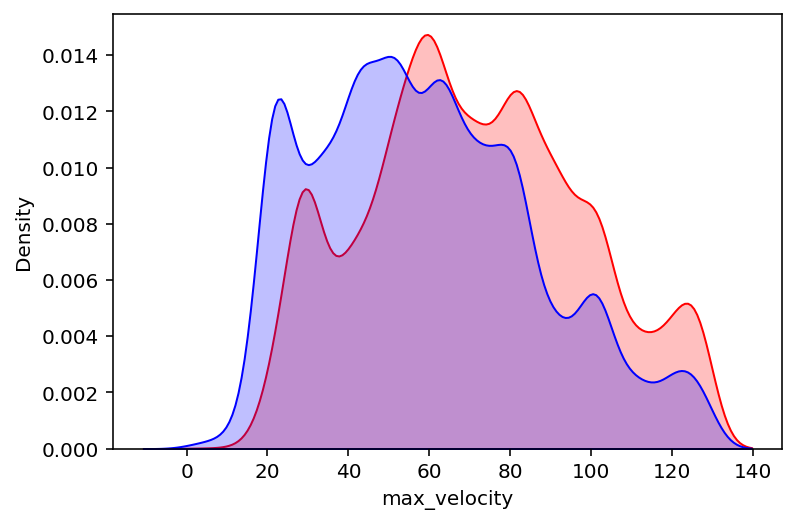

In [163]:
sns.kdeplot(df['max_velocity'],color='red',shade=True)
sns.kdeplot(df['min_velocity'],color='blue',shade=True)
plt.show()

Correlation between variables

In [164]:
crosstab=pd.crosstab(index=df["pitch_range"],columns=df["track_role"])
print (crosstab)

track_role   accompaniment  bass  main_melody  pad  riff  sub_melody
pitch_range                                                         
high                     2     0          310   73   142         202
low                     14   304            3   32     6          40
mid                    970     4          742  700   335         677
mid_high               116     2         1917  182   450        1035
mid_low               1405   122           75  733   118         357
very_high                0     0            1    0     0           1
very_low                 3    71            0    0     0           0


<AxesSubplot:xlabel='track_role', ylabel='pitch_range'>

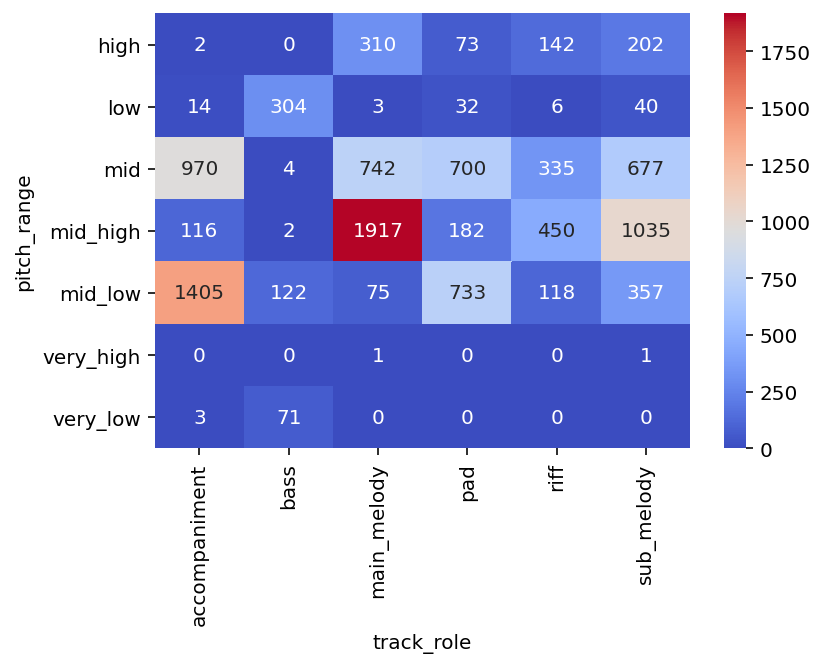

In [165]:
sns.heatmap(crosstab,cmap="coolwarm", annot = True,fmt='.5g')

In [77]:
crosstab2=pd.crosstab(index=df["track_role"],columns=df["instrument_category"])
print(crosstab2)

instrument_category     0   1    2    3     4    5   6   7
track_role                                                
accompaniment        1574   6    0  238   692    0   0   0
bass                  113   0    0   78   268   44   0   0
main_melody          1302  32  207   33  1113  341   0  20
pad                   208   0    0    0  1386  107   0  19
riff                  413   0   18  138   478    0   0   4
sub_melody            374  15  296  105  1001  443  32  46


<AxesSubplot:xlabel='instrument_category', ylabel='track_role'>

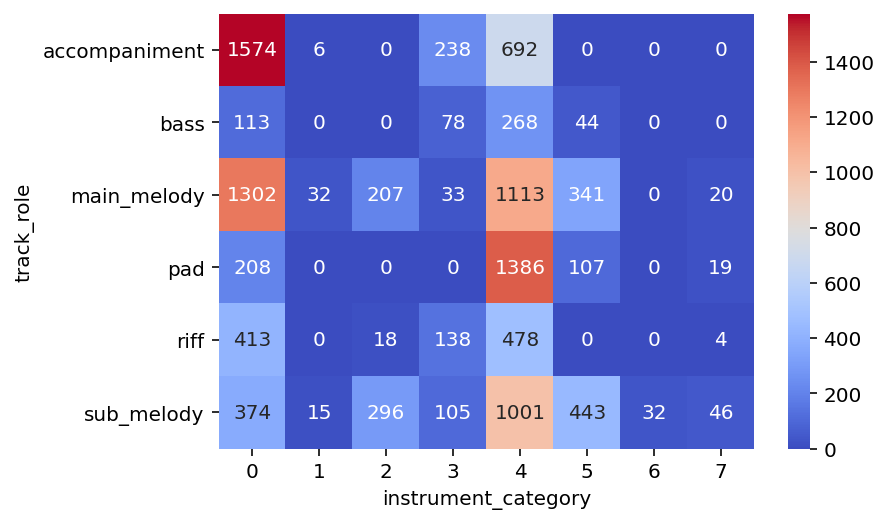

In [166]:
sns.heatmap(crosstab2,cmap="coolwarm", annot = True,fmt='.5g')

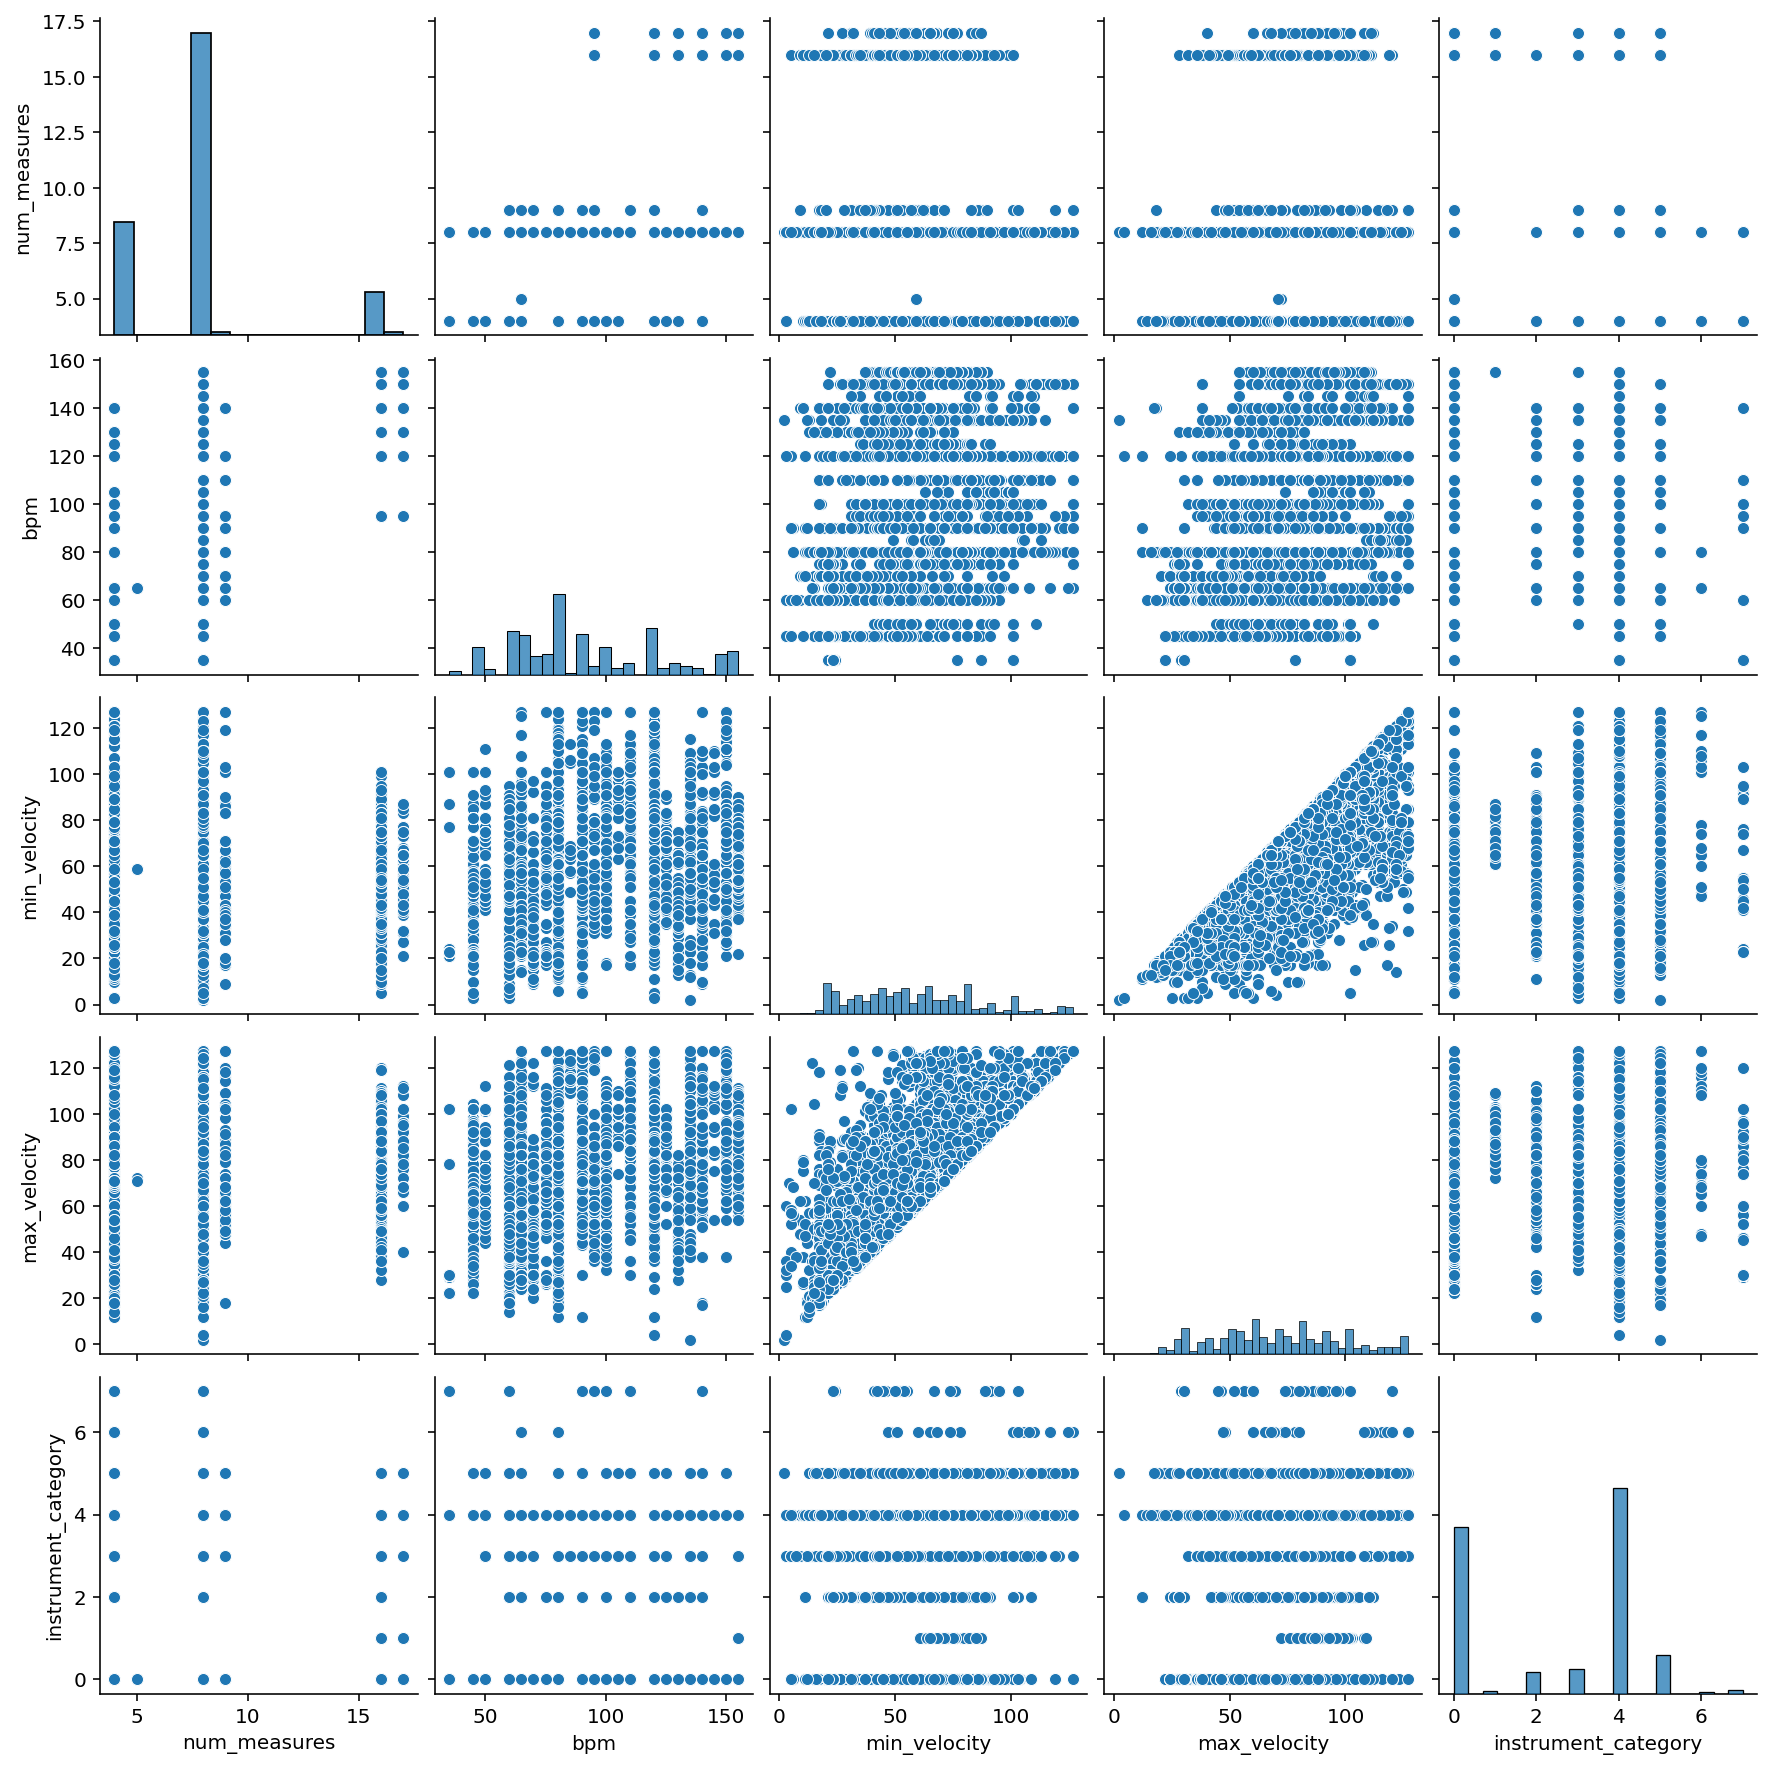

In [130]:
sns.pairplot(df)
plt.show()

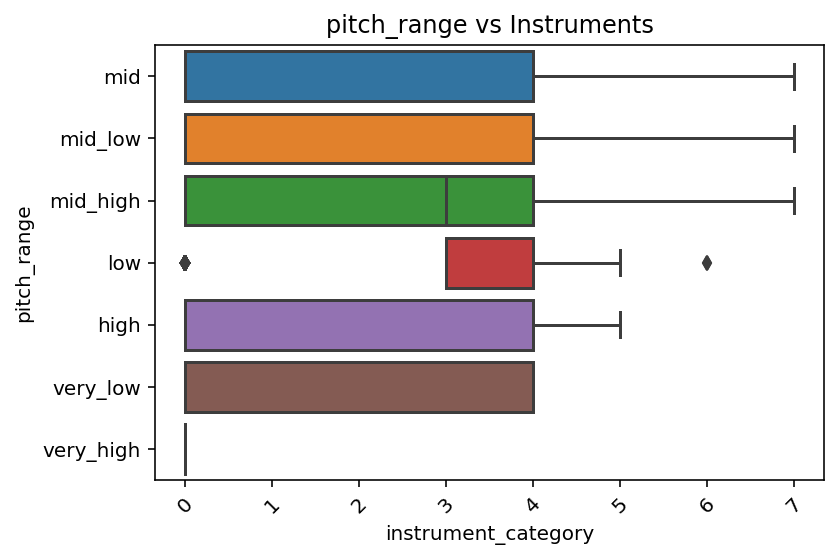

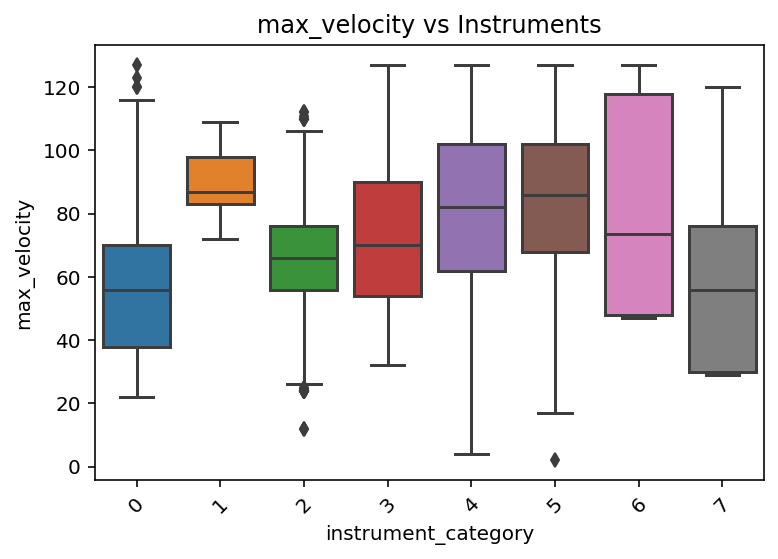

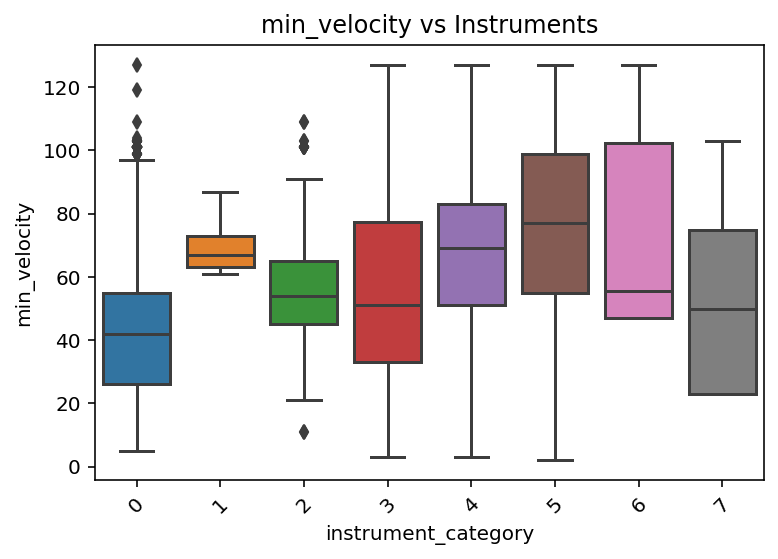

In [133]:
for num_feature in numerical_features:
    sns.boxplot(x='instrument_category', y=num_feature, data=df)
    plt.title(f'{num_feature} vs Instruments')
    plt.xticks(rotation=45)
    plt.show()

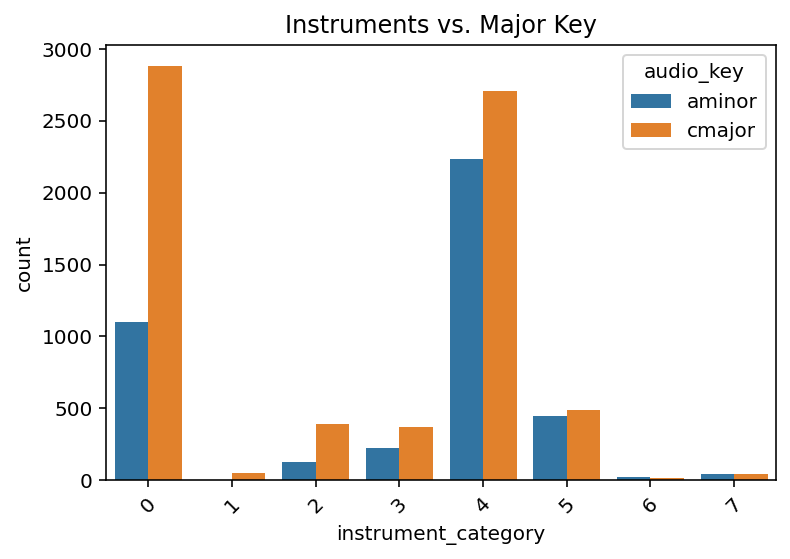

In [134]:
sns.countplot(x='instrument_category', hue='audio_key', data=df)
plt.title('Instruments vs. Major Key')
plt.xticks(rotation=45)
plt.show()

[Text(0.5, 0, '')]

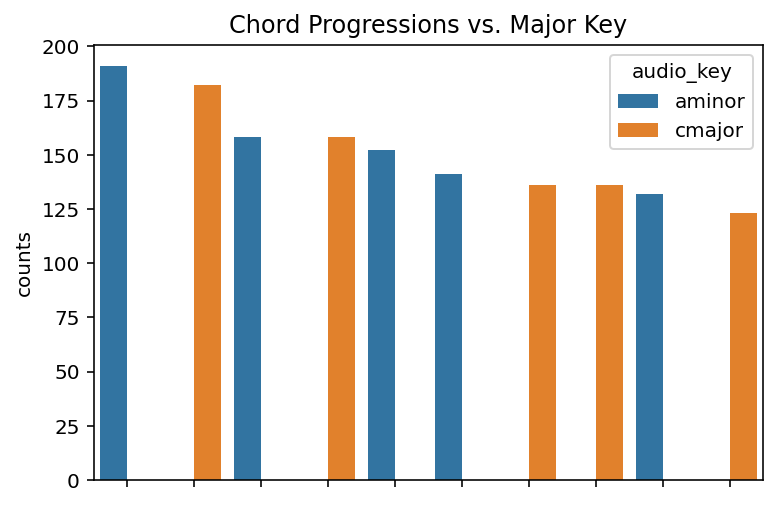

In [175]:
chord_key_counts = df.groupby(['chord_progressions', 'audio_key']).size().reset_index(name='counts')

top_chord_keys = chord_key_counts.sort_values(by='counts', ascending=False).head(10)

x=sns.barplot(x='chord_progressions', y='counts', hue='audio_key', data=top_chord_keys)
plt.title('Chord Progressions vs. Major Key')
x.set(xticklabels=[])  
x.set(xlabel=None)  

In [178]:
print(top_chord_keys)

                                    chord_progressions audio_key  counts
27   [['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...    aminor     191
141  [['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F',...    cmajor     182
260  [['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G',...    aminor     158
143  [['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F',...    cmajor     158
285  [['Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7', 'Fmaj7',...    aminor     152
0    [['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...    aminor     141
165  [['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'G',...    cmajor     136
91   [['Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'A...    cmajor     136
69   [['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A...    aminor     132
137  [['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'Em'...    cmajor     123


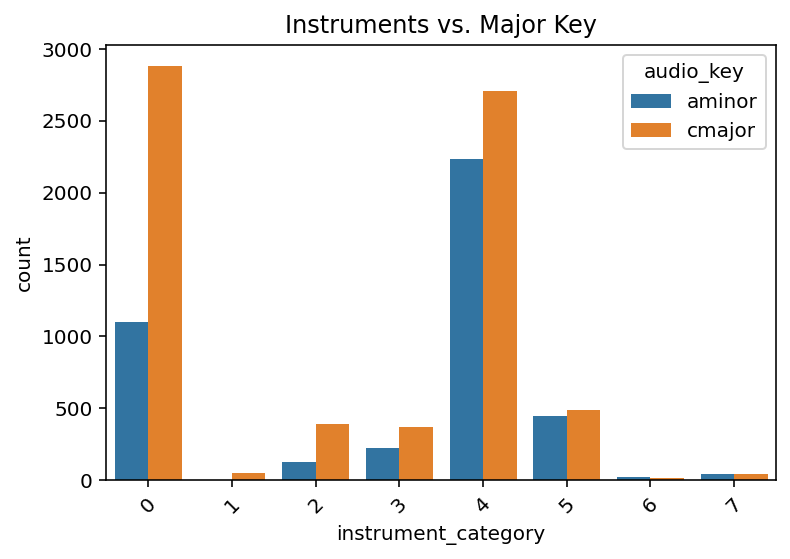

In [90]:
sns.countplot(x='instrument_category', hue='audio_key', data=df)
plt.title('Instruments vs. Major Key')
plt.xticks(rotation=45)
plt.show()

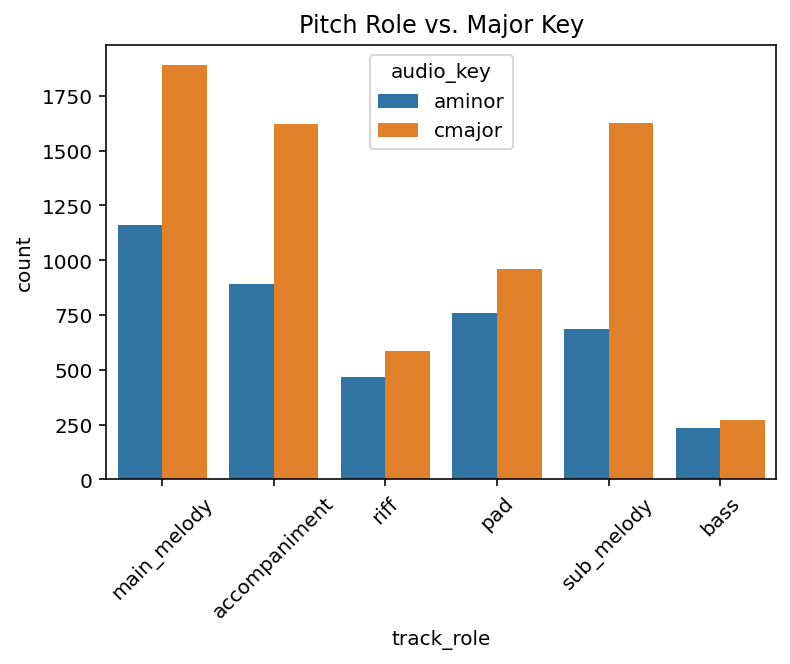

In [96]:
sns.countplot(x='track_role', hue='audio_key', data=df)
plt.title('Pitch Role vs. Major Key')
plt.xticks(rotation=45)
plt.show()


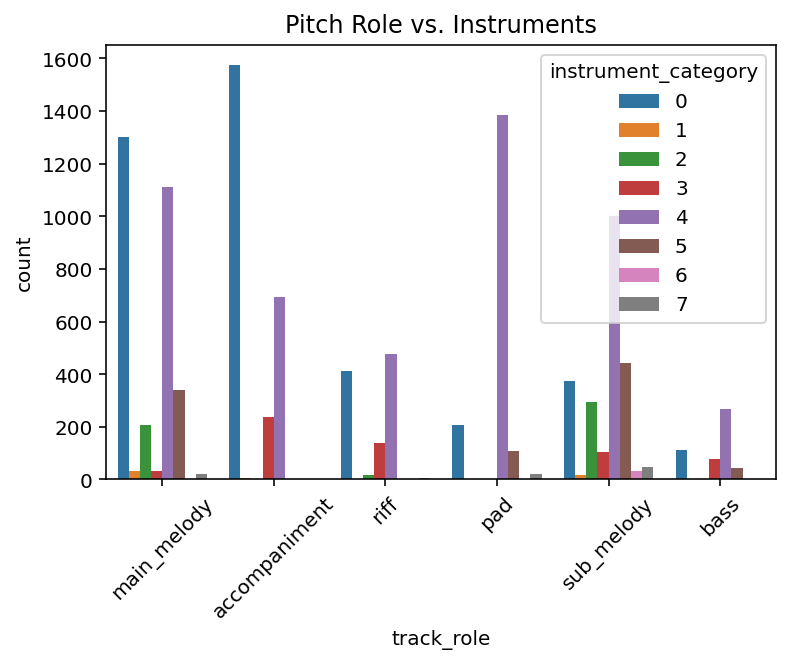

In [93]:
sns.countplot(x='track_role', hue='instrument_category', data=df)
plt.title('Pitch Role vs. Instruments')
plt.xticks(rotation=45)
plt.show()

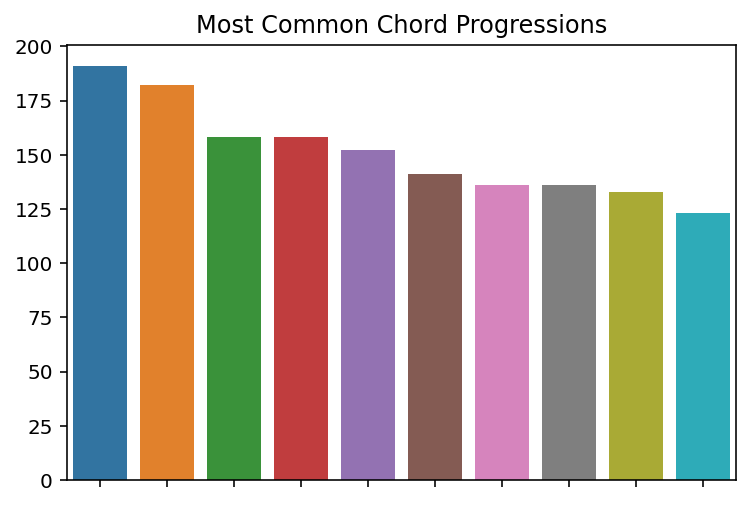

In [176]:
chord_progressions_counts = df['chord_progressions'].value_counts().head(10)

x=sns.barplot(x=chord_progressions_counts.index, y=chord_progressions_counts.values)
plt.title('Most Common Chord Progressions')
plt.xticks(rotation=90)
x.set(xticklabels=[])  
x.set(xlabel=None) 
plt.show()

In [177]:
print(chord_progressions_counts)

[['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'Am7', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Adim', 'Adim', 'Adim', 'Adim', 'Adim', 'Adim', 'Adim', 'Adim', 'Asus4', 'Asus4', 'Asus4', 'Asus4', 'Asus4', 'Asus4', 'Asus4', 'Asus4', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'A#maj7', 'A#maj7', 'A#maj7', 'A#maj7', 'A#maj7', 'A#maj7', 'A#maj7', 'A#maj7']]                                                                                                                                                                                                                                                                                                    191
[['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', '